<a href="https://colab.research.google.com/github/rmrramani/ds-projects/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This notebook will implement the image classification task using convolutional neural network
#below is the link for source image
#Source: https://drive.google.com/file/d/1EbVifjP0FQkyB1axb7KQ26yPtWmneApJ/view?usp=sharing

In [2]:
#import libraries

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical

from collections import Counter

In [3]:
#this is parent folder where all the images where placed
file_path='/content/drive/MyDrive/Con_nn/emergency_or_not/'

In [4]:
#create folder for train and test image and each should have subfolders for notemergency and emergency,i.e  each class should have one folder under train and test

train_path=file_path+'train_path/'
test_path=file_path+'test_path/'

# %cd '/content/drive/MyDrive/Con_nn/emergency_or_not/'

# !mkdir train_path
# !mkdir test_path

# os.chdir(train_path)
# !mkdir notemergency
# !mkdir emergency

# os.chdir(test_path)
# !mkdir notemergency
# !mkdir emergency

# print(f"training_folder  :{os.listdir(train_path)}")

# print("<....>")

# print(f"test_folder      :{os.listdir(test_path)}")


In [5]:
#list files and folders in parent folder
os.listdir(file_path)

['emergency_train.csv', 'images', 'train_path', 'test_path']

In [6]:
#emergency_train.csv is having image file name and labels
emergency_file=file_path+'emergency_train.csv'
df=pd.read_csv(emergency_file)
df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [7]:
#check for df length
df.shape

(1646, 2)

In [8]:
#check number of images in parent folder that is images
no_of_images=os.listdir(file_path+'images/')
print(len(no_of_images))

1702


In [9]:
#df have  56 images fewer than the 'images' folder
#let's do one more check how many images availabe in common between the df and 'images' folder
common_images=set(os.listdir(file_path+'images/')).intersection(df['image_names'].to_list())
print(len(common_images))

1198


In [10]:
#will consider these 1198 images for analysis rather than trying to assign classes to images (will look into this later)
#filter the common images in df

images_in_imagesfolder=os.listdir(file_path+'images/')
df['images_available_with_class']=df['image_names'].isin(images_in_imagesfolder)
df=df[df['images_available_with_class']==True]
df.shape

(1198, 3)

In [11]:
#check for class distribution
df['emergency_or_not'].value_counts(normalize=True)*100

0    79.883139
1    20.116861
Name: emergency_or_not, dtype: float64

In [12]:
#split images for train and test set

X=df['image_names'].values
y=df['emergency_or_not'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, shuffle=True,stratify=y)

train_list=[(x,y) for x, y in zip(X_train,y_train)]
test_list=[(x,y) for x, y in zip(X_test,y_test)]

In [13]:
y_train_counts=Counter(y_train)
y_test_counts=Counter(y_test)


for x,y in y_train_counts.items():
  print(f"Percentage class {x} in y_train: {round(y_train_counts[x]/len(y_train)*100,2)}%")
print(y_train_counts)
print('\n')
for x,y in y_test_counts.items():
  print(f"Percentage class {x} in y_test: {round(y_test_counts[x]/len(y_test)*100,2)}%")
print(y_test_counts)

Percentage class 0 in y_train: 79.85%
Percentage class 1 in y_train: 20.15%
Counter({0: 765, 1: 193})


Percentage class 0 in y_test: 80.0%
Percentage class 1 in y_test: 20.0%
Counter({0: 192, 1: 48})


In [14]:
#check shape of the X_train and X_test
print(X_train.shape)
print(X_test.shape)

(958,)
(240,)


In [15]:
#below code block will copy all these 1198 images to the train_path,test_path and its corresponding subfolders (emergency,notemergency) from images folder

# for x,y in train_list:
#   #%cp -av YOUR_FOLDER NEW_FOLDER_COPY
#   if y==0:

#     %cp -av '/content/drive/MyDrive/Con_nn/emergency_or_not/images/'{x} '/content/drive/MyDrive/Con_nn/emergency_or_not/train_path/notemergency'
#   else:


#     %cp -av '/content/drive/MyDrive/Con_nn/emergency_or_not/images/'{x} '/content/drive/MyDrive/Con_nn/emergency_or_not/train_path/emergency'


# for x,y in test_list:
#   if y==0:

#     %cp -av '/content/drive/MyDrive/Con_nn/emergency_or_not/images/'{x} '/content/drive/MyDrive/Con_nn/emergency_or_not/test_path/notemergency'
#   else:


#     %cp -av '/content/drive/MyDrive/Con_nn/emergency_or_not/images/'{x} '/content/drive/MyDrive/Con_nn/emergency_or_not/test_path/emergency'

In [16]:
#check all files are copied properly 
train_notemergency=len(os.listdir('/content/drive/MyDrive/Con_nn/emergency_or_not/train_path/notemergency'))
train_emergency=len(os.listdir('/content/drive/MyDrive/Con_nn/emergency_or_not/train_path/emergency'))
test_notemergency=len(os.listdir('/content/drive/MyDrive/Con_nn/emergency_or_not/test_path/notemergency'))
test_emergency=len(os.listdir('/content/drive/MyDrive/Con_nn/emergency_or_not/test_path/emergency'))

com_dict={'train_notemergency':train_notemergency,'train_emergency':train_emergency,'test_notemergency':test_notemergency,'test_emergency':test_emergency}
sum=0
for i,k in com_dict.items():
  print(f"no of images in {i}: {k}")
  sum=sum+com_dict[i]
print(f"Toatal number images: {sum}")

no of images in train_notemergency: 765
no of images in train_emergency: 193
no of images in test_notemergency: 192
no of images in test_emergency: 48
Toatal number images: 1198


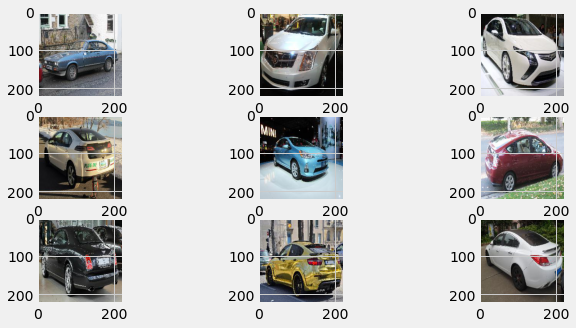

In [17]:
#plot not_emergency vehicles
notemerg=train_path+'notemergency/'
plt.figure(figsize=(10,5))
index=1
for i,j in enumerate(os.listdir(notemerg)[0:10]):
  
  plt.subplot(3,3,index);
  plt.imshow(imread(notemerg+j));
  index+=1
  if index>9:
    break

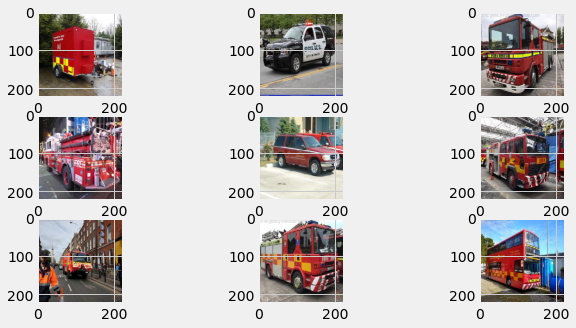

In [18]:
#plot emergency vehicles
emerg=train_path+'emergency/'
plt.figure(figsize=(10,5))
index=1
for i,j in enumerate(os.listdir(emerg)[0:10]):
  
  plt.subplot(3,3,index);
  plt.imshow(imread(emerg+j));
  index+=1
  if index>9:
    break

In [19]:
#check image shape(dimension)
imread(notemerg+os.listdir(notemerg)[0]).shape

(224, 224, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


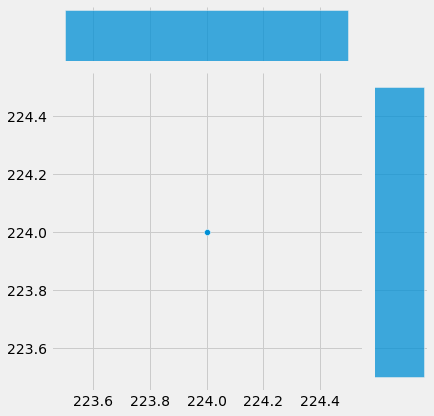

In [20]:
#check height vs width for not emergency vehicles
dim1=list()
dim2=list()

for image in os.listdir(train_path+'notemergency/'):
  img_array=imread(train_path+'notemergency/'+image)
  h,w,channel=img_array.shape
  dim1.append(w)
  dim2.append(h)
#join plot for dim1 vs dim2
sns.jointplot(dim1,dim2);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


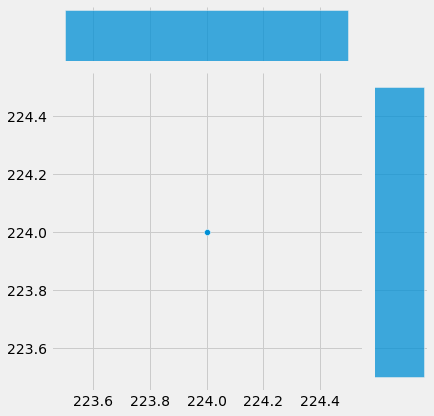

In [21]:
#check height vs width for emergency vehicles
dim1=list()
dim2=list()

for image in os.listdir(train_path+'emergency/'):
  img_array=imread(train_path+'emergency/'+image)
  h,w,channel=img_array.shape
  dim1.append(w)
  dim2.append(h)
#join plot for dim1 vs dim2
sns.jointplot(dim1,dim2);

In [22]:
#it seems pixels dimensions are 224*224, such a way that tailred the image pixels from data source
#let's do image data augmentation
shift=0.15
image_generator=ImageDataGenerator(rotation_range=90,
                                   width_shift_range=shift,height_shift_range=shift,rescale=1/255)

In [23]:
image_generator.flow_from_directory(train_path)

Found 958 images belonging to 2 classes.


In [24]:
image_generator.flow_from_directory(test_path)

Found 240 images belonging to 2 classes.


In [25]:
#create sequential model with convolutional and Polling layer
image_shape=(224,224,3)

model=Sequential()

model.add(Conv2D(filters=20,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=36,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten and dense layer

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))



model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 20)      560       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 20)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 28)      5068      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 36)        9108      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24336)             0

In [27]:
#Early stopping and batch size adn no of epochs
early_stop=EarlyStopping(monitor='val_loss',patience=3)
batch_size=32
epochs = 50

In [28]:
#flow from train path of image generator
train_generator=image_generator.flow_from_directory(train_path,
                                    target_size=image_shape[:2],
                                    color_mode='rgb',
                                    class_mode='binary',
                                    batch_size=batch_size,
                                    shuffle=True)

Found 958 images belonging to 2 classes.


In [29]:
#flow from test path of image generator
test_generator=image_generator.flow_from_directory(test_path,
                                    target_size=image_shape[:2],
                                    color_mode='rgb',
                                    class_mode='binary',
                                    batch_size=batch_size,
                                    shuffle=False)

Found 240 images belonging to 2 classes.


In [30]:
#check for class indices
train_generator.class_indices

{'emergency': 0, 'notemergency': 1}

In [31]:
#fit model
results=model.fit_generator(train_generator,epochs=epochs,validation_data=test_generator,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 21s 620ms/step - loss: 0.5671 - accuracy: 0.7944 - val_loss: 0.4930 - val_accuracy: 0.8000
Epoch 2/50
30/30 [==============================] - 18s 588ms/step - loss: 0.4862 - accuracy: 0.7996 - val_loss: 0.5209 - val_accuracy: 0.8042
Epoch 3/50
30/30 [==============================] - 18s 586ms/step - loss: 0.4679 - accuracy: 0.7985 - val_loss: 0.4821 - val_accuracy: 0.7917
Epoch 4/50
30/30 [==============================] - 18s 608ms/step - loss: 0.4463 - accuracy: 0.7850 - val_loss: 0.4539 - val_accuracy: 0.8000
Epoch 5/50
30/30 [==============================] - 18s 590ms/step - loss: 0.4444 - accuracy: 0.7965 - val_loss: 0.4765 - val_accuracy: 0.8167
Epoch 6/50
30/30 [==============================] - 18s 590ms/step - loss: 0.4178 - accuracy: 0.8236 - val_loss: 0.4470 - val_accuracy: 0.8000
Epoch 7/50
30/30 [==============================] - 18s 608ms/step - loss: 0.4228 - accuracy: 0.8278 - val_loss: 0.4659 - val_accuracy: 0.8208

In [32]:
#load model histroy into a dataframe
loss_df=pd.DataFrame(results.history)

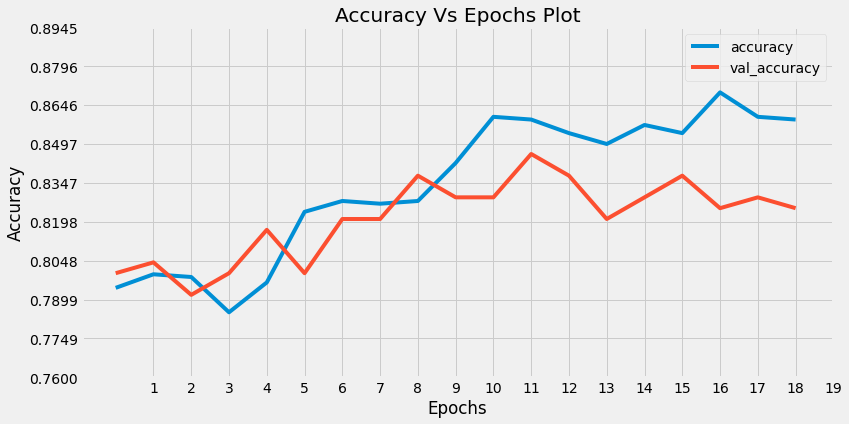

In [33]:
#plot laccuracy versus epochs
xticks=list(range(1,loss_df.shape[0]+1))
yticks=list(np.linspace(min(loss_df['accuracy'].min(),loss_df['val_accuracy'].min())-0.025,max(loss_df['accuracy'].max(),loss_df['val_accuracy'].max())+0.025,10))
loss_df[['accuracy','val_accuracy']].plot(figsize=(12,6));
plt.title("Accuracy Vs Epochs Plot");
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.xticks(xticks);
plt.yticks(yticks);

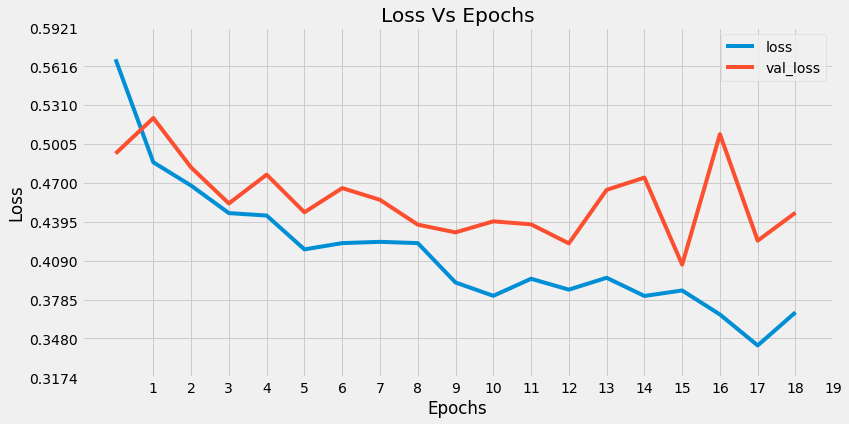

In [34]:
#plot loss versus epochs
xticks=list(range(1,loss_df.shape[0]+1))
yticks=list(np.linspace(min(loss_df['loss'].min(),loss_df['val_loss'].min())-0.025,max(loss_df['loss'].max(),loss_df['val_loss'].max())+0.025,10))
loss_df[['loss','val_loss']].plot(figsize=(12,6));
plt.title("Loss Vs Epochs");
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.xticks(xticks);
plt.yticks(yticks);

##Let's try with pre-trained model

In [35]:
#load pretrained model
#assign False for include_top argument to omit softmax layer
ptr_model=VGG16(include_top=False, weights='imagenet')
ptr_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [36]:
## extract train and test features
vgg_feat_train=ptr_model.predict(train_generator)
vgg_feat_test=ptr_model.predict(test_generator)
##OneHotEncoding Target Column
train_target=to_categorical(train_generator.labels)
test_target=to_categorical(test_generator.labels)

In [37]:
#check vgg feature
vgg_feat_test.shape

(240, 7, 7, 512)

In [38]:
#create sequential model fit and validate of vgg features
model_wvgg16 = Sequential()
model_wvgg16.add(Flatten(input_shape=(7,7,512)))
model_wvgg16.add(Dense(100, activation='relu'))
model_wvgg16.add(Dropout(0.5))
model_wvgg16.add(BatchNormalization())
model_wvgg16.add(Dense(2, activation='sigmoid'))

# compile the model
model_wvgg16.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

model_wvgg16.summary()
early_stop=EarlyStopping(monitor='val_accuracy',patience=3)
# train model using features generated from VGG16 model
results2=model_wvgg16.fit(vgg_feat_train, train_target, epochs=epochs, batch_size=batch_size, validation_data=(vgg_feat_test, test_target),callbacks=[early_stop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 2,509,502
Trainable params: 2,509,302
Non-trainable params: 200
_________________________________________________________________
Epoch 1/50
30/30 [==============================] - 1s 15ms/step - loss: 0.7429 - accuracy: 0.5522 - val_los

In [39]:
#load model histroy into a dataframe
loss_df=pd.DataFrame(results2.history)

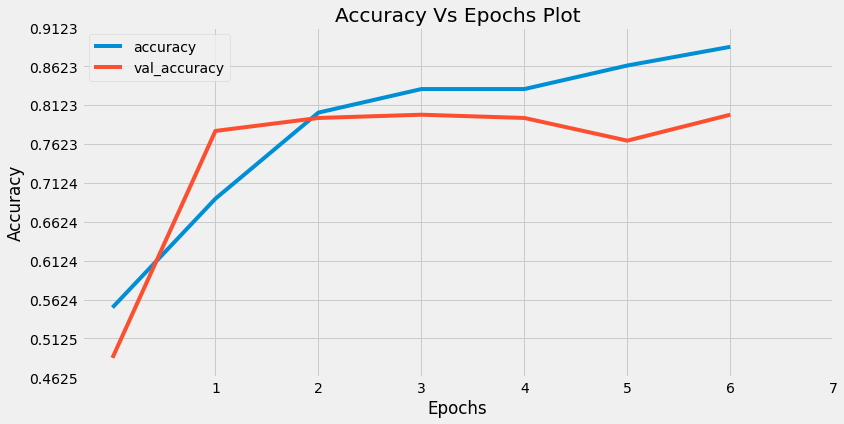

In [40]:
#plot loss versus epochs
xticks=list(range(1,loss_df.shape[0]+1))
yticks=list(np.linspace(min(loss_df['accuracy'].min(),loss_df['val_accuracy'].min())-0.025,max(loss_df['accuracy'].max(),loss_df['val_accuracy'].max())+0.025,10))
loss_df[['accuracy','val_accuracy']].plot(figsize=(12,6));
plt.title("Accuracy Vs Epochs Plot");
plt.xlabel('Epochs');
plt.ylabel('Accuracy');
plt.xticks(xticks);
plt.yticks(yticks);

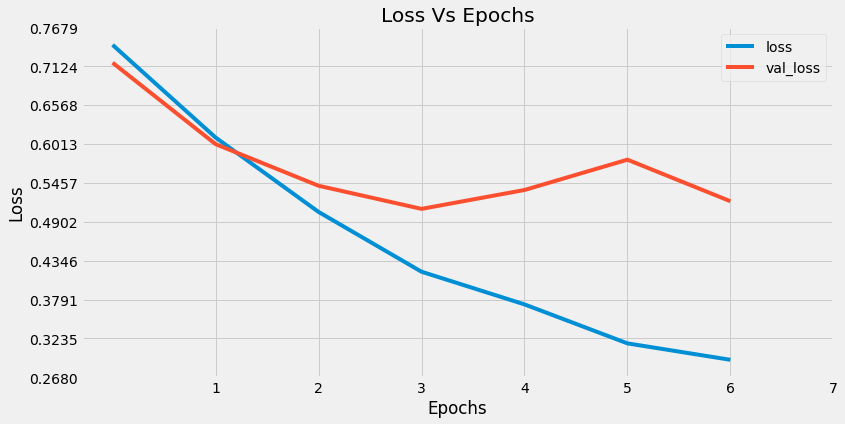

In [41]:
#plot loss versus epochs
xticks=list(range(1,loss_df.shape[0]+1))
yticks=list(np.linspace(min(loss_df['loss'].min(),loss_df['val_loss'].min())-0.025,max(loss_df['loss'].max(),loss_df['val_loss'].max())+0.025,10))
loss_df[['loss','val_loss']].plot(figsize=(12,6));
plt.title("Loss Vs Epochs");
plt.xlabel('Epochs');
plt.ylabel('Loss');
plt.xticks(xticks);
plt.yticks(yticks);

##VGG16 model learning fast i.e lesser no epochs. The same image dataset or another dataset with multiclass will be taken for next **CNN Image Classification Tasks**